***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

C:\Users\ju_li\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importe o dataset e armazene o conteúdo em uma DataFrame

In [3]:
df = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [4]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [5]:
df.shape

(76840, 7)

### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

<b>A</b> ► Acima de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Até 1.576

In [7]:
classes = [df.Renda.min(), 1576, 3152, 7880, 15760, df.Renda.max()]
classes

[0, 1576, 3152, 7880, 15760, 200000]

### 2º Definir os labels das classes

In [8]:
labels = ['E','D','C','B','A']
labels

['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [9]:
classes_renda = pd.cut(x = df.Renda,
                       labels = labels,
                       bins = classes,
                       include_lowest = True)
classes_renda

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): [E < D < C < B < A]

In [12]:
freq_class_renda = classes_renda.value_counts()
freq_class_renda

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [13]:
perc_class_renda = classes_renda.value_counts(normalize = True) * 100
perc_class_renda

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [26]:
class_renda_freq_perc = pd.DataFrame({'Frequência:': freq_class_renda, 'Percentual (%)': perc_class_renda})
class_renda_freq_perc.sort_index(ascending = False, inplace = True)
class_renda_freq_perc.reset_index(inplace=True)
class_renda_freq_perc.rename(columns={'index': 'Classes'}, inplace = True)
class_renda_freq_perc

,Classes,Frequência:,Percentual (%)
0,A,608,0.791255
1,B,2178,2.834461
2,C,7599,9.889381
3,D,16700,21.733472
4,E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

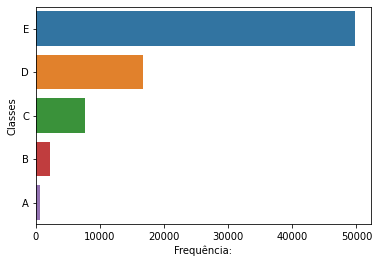

In [27]:
ax = sns.barplot(x="Frequência:", y = 'Classes', data=class_renda_freq_perc)

> ### Conclusões

Analisando a tabela de frequência e o gráfico de barras, é possível identificar que 60% da população pertence a classe E e sobrevive com até 1.576 reais. Em contraste, menos de 1% da população pertence a classe A que tem uma renda acima de 15.760 reais. A partir desses dados, é possível constatar que existe uma má distribuição das riquezas no Brasil e que grande parte da população vive em extrema pobreza.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

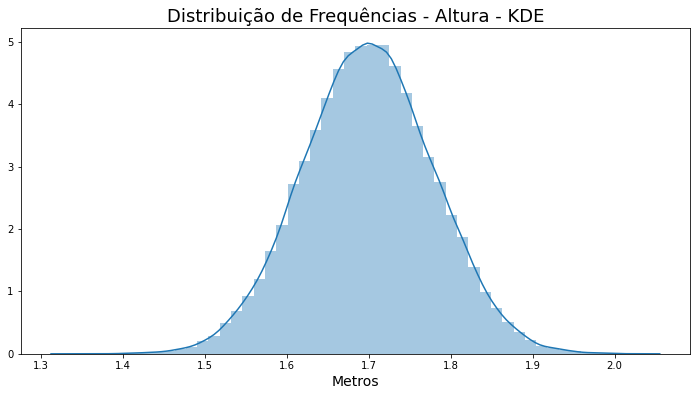

In [29]:
ax = sns.distplot(df.Altura)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)

ax

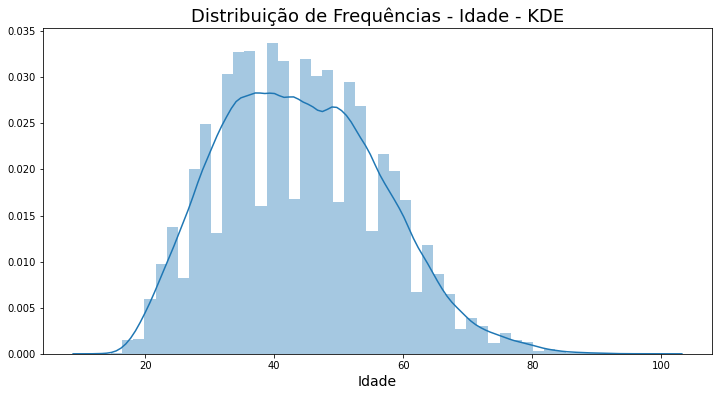

In [30]:
ax = sns.distplot(df.Idade)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Idade - KDE', fontsize=18)
ax.set_xlabel('Idade', fontsize=14)

ax

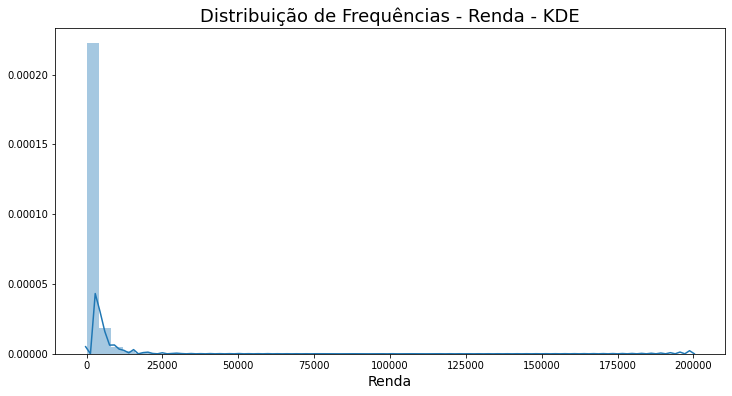

In [31]:
ax = sns.distplot(df.Renda)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Renda - KDE', fontsize=18)
ax.set_xlabel('Renda', fontsize=14)

ax

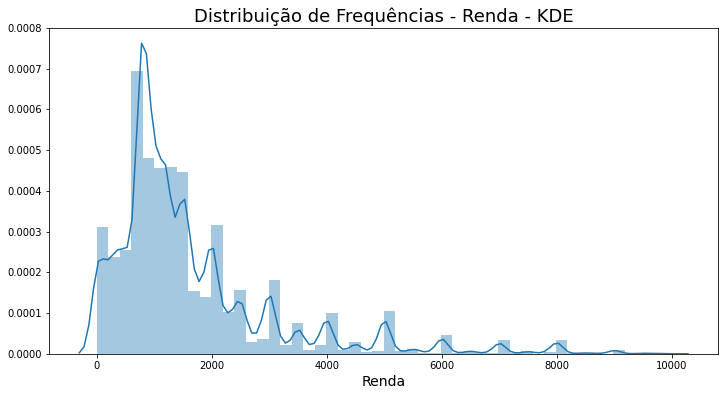

In [34]:
ax = sns.distplot(df.query('Renda < 10000').Renda)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Renda - KDE', fontsize=18)
ax.set_xlabel('Renda', fontsize=14)

ax

> ### Conclusões

A variável Altura tem uma distribuição simétrica, mas vale ressaltar que foi uma variável criada ao longo do curso para ter essa característica. 
As variáveis Idade e Renda possuem assimetria á direita, isso é um sinal de que essa amostra pode conter outliers.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

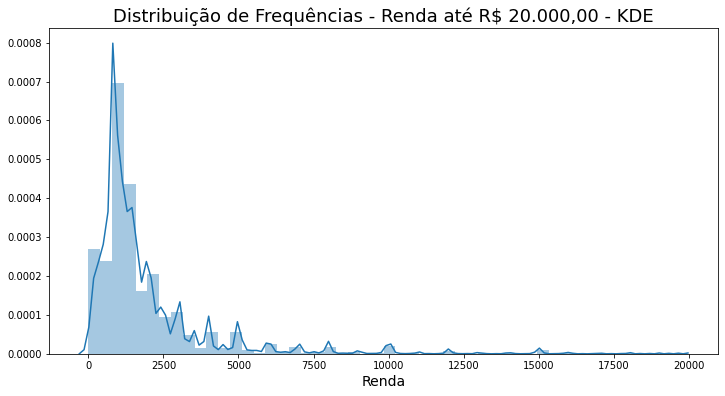

In [37]:
ax = sns.distplot(df.query('Renda < 20000').Renda)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Renda até R$ 20.000,00 - KDE', fontsize=18)
ax.set_xlabel('Renda', fontsize=14)

ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [38]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}

anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}

uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [42]:
freq_cor_sex = pd.crosstab(index = df.Sexo, columns = df.Cor)
freq_cor_sex.rename(index = sexo, inplace = True)
freq_cor_sex.rename(columns = cor, inplace = True)
freq_cor_sex

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [43]:
perc_cor_sex = pd.crosstab(index = df.Sexo, columns = df.Cor, normalize = True) * 100
perc_cor_sex.rename(index = sexo, inplace = True)
perc_cor_sex.rename(columns = cor, inplace = True)
perc_cor_sex

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [55]:
print('A média da Renda é: ', df.Renda.mean())

A média da Renda é:  2000.3831988547631


### Obtenha a mediana

In [56]:
print('A mediana da Renda é: ', df.Renda.median())

A mediana da Renda é:  1200.0


### Obtenha a moda

In [57]:
print('A moda da Renda é: ', df.Renda.mode())

A moda da Renda é:  0    788
dtype: int64


### Obtenha o desvio médio absoluto

In [58]:
print('O desvio médio absoluto da Renda é: ', df.Renda.mad())

O desvio médio absoluto da Renda é:  1526.4951371644931


### Obtenha a variância

In [59]:
print('A variância da Renda é: ', df.Renda.var())

A variância da Renda é:  11044906.00622118


### Obtenha o desvio-padrão

In [60]:
print('O desvio padrão da Renda é: ', df.Renda.std())

O desvio padrão da Renda é:  3323.3877303470294


### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [66]:
renda_sex_cor = pd.crosstab(index = df.Sexo, columns = df.Cor, values = df.Renda, aggfunc = {'mean', 'median', 'max'})
renda_sex_cor.rename(index = sexo, inplace = True)
renda_sex_cor.rename(columns = cor, inplace = True)
renda_sex_cor

max                                               mean  \
Cor        Indígena    Branca    Preta  Amarela     Parda     Indígena   
Sexo                                                                     
Masculino   10000.0  200000.0  50000.0  50000.0  100000.0  1081.710938   
Feminino   120000.0  100000.0  23000.0  20000.0   30000.0  2464.386139   

                                                                median  \
Cor             Branca        Preta      Amarela        Parda Indígena   
Sexo                                                                     
Masculino  2925.744435  1603.861687  4758.251064  1659.577425    797.5   
Feminino   2109.866750  1134.596400  3027.341880  1176.758516    788.0   

                                           
Cor        Branca   Preta Amarela   Parda  
Sexo                                       
Masculino  1700.0  1200.0  2800.0  1200.0  
Feminino   1200.0   800.0  1500.0   800.0

> ### Conclusões

Analisando a tabela acima fica claro que a disparidade da renda entre sexo e cor. Uma mulher branca tem em média uma renda de 2.109 reais, enquanto uma mulher preta tem em média uma renda de 1.134 reais

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [67]:
renda_sex_cor2 = pd.crosstab(index = df.Sexo, columns = df.Cor, values = df.Renda, aggfunc = {'mad', 'var', 'std'})
renda_sex_cor2.rename(index = sexo, inplace = True)
renda_sex_cor2.rename(columns = cor, inplace = True)
renda_sex_cor2

mad                                                     \
Cor           Indígena       Branca       Preta      Amarela        Parda   
Sexo                                                                        
Masculino   798.910889  2261.012346  975.602482  3709.597211  1125.827704   
Feminino   3007.892952  1670.967106  705.453357  2549.146322   811.580946   

                    std                                                     \
Cor            Indígena       Branca        Preta     Amarela        Parda   
Sexo                                                                         
Masculino   1204.093490  4750.791872  1936.309271  5740.82482  2312.087184   
Feminino   11957.498292  3251.013154  1349.799809  3731.17366  1596.233048   

                    var                                            \
Cor            Indígena        Branca         Preta       Amarela   
Sexo                                                                
Masculino  1.449841e+06  2.257002e+07  3.749294e+06  3.295707e+07   
Feminino   1.429818e+08  1.056909e+07  1.821960e+06  1.392166e+07   

                         
Cor               Parda  
Sexo                     
Masculino  5.345747e+06  
Feminino   2.547960e+06

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

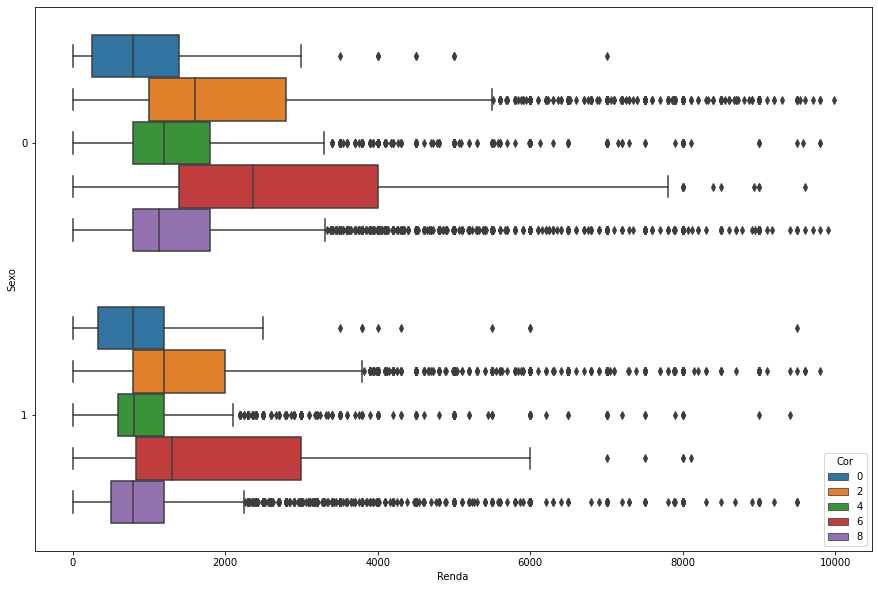

In [74]:
ax = sns.boxplot(x = 'Renda', y = "Sexo", hue = "Cor", data = df.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(15, 10)
ax